# Lab 3: ML Life Cycle: Modeling

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Decision Trees (DTs) and KNNs have many similarities. They are models that are fairly simple and intuitive to understand, can be used to solve both classification and regression problems, and are non-parametric models, meaning that they don't assume a particular relationship between the features and the label prior to training. However, KNNs and DTs each have their own advantages and disadvantages. In addition, one model may be better suited than the other for a particular machine learning problem based on multiple factors, such as the size and quality of the data, the problem-type and the hyperparameter configuration. For example, KNNs require feature values to be scaled, whereas DTs do not. DTs are also able to handle noisy data better than KNNs. 

Often times, it is beneficial to train multiple models on your training data to find the one that performs the best on the test data. 

In this lab, you will continue practicing the modeling phase of the machine learning life cycle. You will train Decision Trees and KNN models to solve a classification problem. You will experiment training multiple variations of the models with different hyperparameter values to find the best performing model for your predictive problem. You will complete the following tasks:
    
    
1. Build your DataFrame and define your ML problem:
    * Load the Airbnb "listings" data set
    * Define the label - what are you predicting?
    * Identify the features
2. Prepare your data:
    * Perform feature engineering by converting categorical features to one-hot encoded values
3. Create labeled examples from the data set
4. Split the data into training and test data sets
5. Train multiple decision trees and evaluate their performances:
    * Fit Decision Tree classifiers to the training data using different hyperparameter values per classifier
    * Evaluate the accuracy of the models' predictions
    * Plot the accuracy of each DT model as a function of hyperparameter max depth
6. Train multiple KNN classifiers and evaluate their performances:
    * Fit KNN classifiers to the training data using different hyperparameter values per classifier
    * Evaluate the accuracy of the models' predictions
    * Plot the accuracy of each KNN model as a function of hyperparameter $k$
7. Analysis:
   * Determine which is the best performing model 
   * Experiment with other factors that can help determine the best performing model

## Part 1. Build Your DataFrame and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame


We will work with a new preprocessed, slimmed down version of the Airbnb NYC "listings" data set. This version is almost ready for modeling, with missing values and outliers taken care of. Also note that unstructured fields have been removed.

In [2]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "airbnbData_Prepared.csv")

<b>Task</b>: Load the data set into a Pandas DataFrame variable named `df`.

In [3]:
df = pd.read_csv(filename, header = 0)

####  Inspect the Data

<b>Task</b>: In the code cell below, inspect the data in DataFrame `df` by printing the number of rows and columns, the column names, and the first ten rows. You may perform any other techniques you'd like to inspect the data.

In [4]:
df.shape

(28022, 43)

#### Define the Label

Assume that your goal is to train a machine learning model that predicts whether an Airbnb host is a 'super host'. This is an example of supervised learning and is a binary classification problem. In our dataset, our label will be the `host_is_superhost` column and the label will either contain the value `True` or `False`. Let's inspect the values in the `host_is_superhost` column.

In [5]:
df['host_is_superhost']

0        False
1        False
2        False
3        False
4        False
         ...  
28017    False
28018    False
28019     True
28020     True
28021    False
Name: host_is_superhost, Length: 28022, dtype: bool

#### Identify Features

Our features will be all of the remaining columns in the dataset. 

<b>Task:</b> Create a list of the feature names.

In [6]:
df.drop(columns = ['host_is_superhost']).columns.tolist()

['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_ro

## Part 2. Prepare Your Data

Many of the data preparation techniques that you practiced in Unit two have already been performed and the data is almost ready for modeling. The one exception is that a few string-valued categorical features remain. Let's perform one-hot encoding to transform these features into numerical boolean values. This will result in a data set that we can use for modeling.

#### Identify the Features that Should be One-Hot Encoded

**Task**: Find all of the columns whose values are of type 'object' and add the column names to a list named `to_encode`.

In [7]:
to_encode = df.select_dtypes(include=['object']).columns.tolist()
to_encode

['neighbourhood_group_cleansed', 'room_type']

**Task**: Find the number of unique values each column in `to_encode` has:

In [8]:
df[to_encode].nunique()

neighbourhood_group_cleansed    5
room_type                       4
dtype: int64

#### One-Hot Encode the Features

Instead of one-hot encoding each column using the NumPy `np.where()` or Pandas `pd.get_dummies()` functions, we can use the more robust `OneHotEncoder` transformation class from `sklearn`. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). 


<b><i>Note:</i></b> We are working with `sklearn` version 0.22.2. You can find documentation for the `OneHotEncoder` class that that corresponds to our version of `sklearn` [here](https://scikit-learn.org/0.20/modules/generated/sklearn.preprocessing.OneHotEncoder.html). When choosing which features of the  `OneHotEncoder` class to use, do not use features that have been introduced in newer versions of `sklearn`. For example, you should specify the parameter `sparse=False` when calling `OneHotEncoder()` to create an encoder object. The documentation notes that the latest version of `sklearn` uses the `sparse_ouput` parameter instead of `sparse`, but you should stick with `sparse`.

<b>Task</b>: Refer to the documenation and follow the instructions in the code cell below to create one-hot encoded features.

In [9]:
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Create the encoder:
# Create the  Scikit-learn OneHotEncoder object below and assign to variable 'enc'.
# When calling OneHotEncoder(), specify that the 'sparse' parameter is False
enc = OneHotEncoder(sparse = False, handle_unknown='ignore')

# Apply the encoder:
# Use the method 'enc.fit_transform() to fit the encoder to the data (the two columns) and transform the data into 
# one-hot encoded values
# Convert the results to a DataFrame and save it to variable 'df_enc'
df_enc = pd.DataFrame(enc.fit_transform(df[to_encode]))



Let's inspect our new DataFrame `df_enc` that contains the one-hot encoded columns.

In [11]:
df_enc.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Notice that the column names are numerical. 

<b>Task:</b> Complete the code below to reinstate the original column names.


In [10]:
# Use the method enc.get_feature_names() to reinstate the original column names. 
# Call the function with the original two column names as arguments.
# Save the results to 'df_enc.columns'

df_enc.columns = enc.get_feature_names(to_encode)


Let's inspect our new DataFrame `df_enc` once again.

In [11]:
df_enc.head(10)

,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<b>Task</b>: You can now remove the original columns that we have just transformed from DataFrame `df`.


In [12]:
df.drop(columns = to_encode, inplace = True)

<b>Task</b>: You can now join the transformed features contained in `df_enc` with DataFrame `df`

In [13]:
df = df.join(df_enc)

Glance at the resulting column names:

In [14]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_r

## Part 3. Create Labeled Examples from the Data Set 

<b>Task</b>: Obtain the feature columns from DataFrame `df` and assign to `X`. Obtain the label column from DataFrame `df` and assign to `y`.


In [15]:
X = df.drop(columns = ['host_is_superhost'])
y = df['host_is_superhost']

In [16]:
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 28022

Number of Features:49
['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'n_host_

## Part 4. Create Training and Test Data Sets

<b>Task</b>: In the code cell below create training and test sets out of the labeled examples using Scikit-learn's `train_test_split()` function. Save the results to variables `X_train, X_test, y_train, y_test`.

Specify:
1. A test set that is one third (.33) of the size of the data set.
2. A seed value of '123'. 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 123)


<b>Task</b>: Check the dimensions of the training and test datasets.

In [18]:
print(X_train.shape)
print(X_test.shape)

(18774, 49)
(9248, 49)


## Part 5. Train Decision Tree Classifers and Evaluate their Performances

The code cell below contains a function definition named `train_test_DT()`. This function should:
1. train a Decision Tree classifier on the training data (Remember to use ```DecisionTreeClassifier()``` to create a model object.)
2. test the resulting model on the test data
3. compute and return the accuracy score of the resulting predicted class labels on the test data. 

<b>Task:</b> Complete the function to make it work.

In [19]:
def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf=1, crit='entropy'):
    
    # 1. Create the Scikit-learn DecisionTreeClassifier model object
    model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf)
    
    # 2. Fit the model to the training data
    model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data 
    class_label_predictions = model.predict(X_test)

    # 4. Compute the accuracy
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return acc_score
    

#### Train Two Decision Trees and Evaluate Their Performances

<b>Task:</b> Use your function to train two different decision trees, one with a max depth of $8$ and one with a max depth of $32$. Print the max depth and corresponding accuracy score.

In [20]:
# Define the depths for the two Decision Trees
depth_1 = 8
depth_2 = 32

# Train the first Decision Tree with max depth of 8 and evaluate its performance
accuracy_1 = train_test_DT(X_train, X_test, y_train, y_test, depth_1)
print(f"Accuracy for Decision Tree with max depth {depth_1}: {accuracy_1}")

# Train the second Decision Tree with max depth of 32 and evaluate its performance
accuracy_2 = train_test_DT(X_train, X_test, y_train, y_test, depth_2)
print(f"Accuracy for Decision Tree with max depth {depth_2}: {accuracy_2}")



Accuracy for Decision Tree with max depth 8: 0.8333693771626297
Accuracy for Decision Tree with max depth 32: 0.8028762975778547


#### Visualize Accuracy

We will be creating multiple visualizations that plot a specific model's hyperparameter value (such as max depth) and the resulting accuracy score of the model.

To create more clean and maintainable code, we will create one visualization function that can be called every time a plot is needed. 

<b>Task:</b> In the code cell below, create a function called `visualize_accuracy()` that accepts two arguments:

1. a list of hyperparamter values
2. a list of accuracy scores

Both lists must be of the same size.

Inside the function, implement a `seaborn` lineplot in which hyperparameter values will be on the x-axis and accuracy scores will be on the y-axis. <i>Hint</i>: You implemented a lineplot in this week's assignment.

In [21]:
def visualize_accuracy(hyperparameter_values, accuracy_scores):
    """
    Function to visualize accuracy scores as a function of hyperparameter values.
    
    Parameters:
    hyperparameter_values (list): A list of hyperparameter values.
    accuracy_scores (list): A list of accuracy scores corresponding to the hyperparameter values.
    
    Returns:
    None
    """
    # Ensure that both lists are of the same size
    assert len(hyperparameter_values) == len(accuracy_scores), "The lists must be of the same size."
    
    # Create a DataFrame for plotting
    data = pd.DataFrame({
        'Hyperparameter': hyperparameter_values,
        'Accuracy': accuracy_scores
    })
    
    # Create the seaborn lineplot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Hyperparameter', y='Accuracy', data=data, marker='o')
    plt.title('Model Accuracy vs. Hyperparameter Value')
    plt.xlabel('Hyperparameter Value')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()



<b>Task</b>: Test your visualization function below by calling the function to plot the max depth values and accuracy scores of the two decision trees that you just trained.

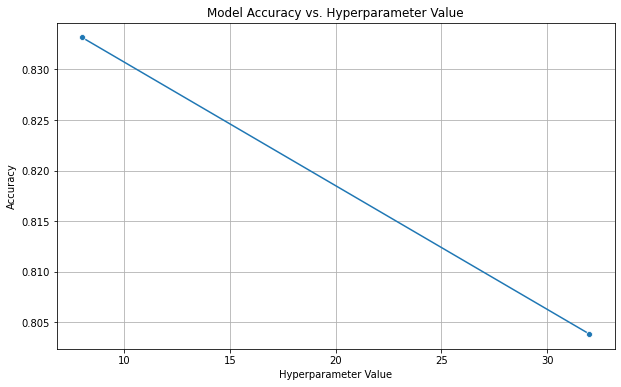

In [22]:
# Define the max depth values and their corresponding accuracy scores
depths = [8, 32]
accuracies = [0.8331531141868512, 0.8038494809688581]

# Test the visualize_accuracy function
visualize_accuracy(depths, accuracies)

<b>Analysis</b>: Does this graph provide a sufficient visualization for determining a value of max depth that produces a high performing model?

The generated plot shows the accuracy of two Decision Tree models with different max depths (8 and 32). While this visualization provides some insight into how the model's performance changes with different max depths, it is limited because it only includes two points. This makes it difficult to determine an optimal value for max depth that produces a high-performing model. 

To determine a value of max depth that produces a high-performing model, it would be beneficial to train and evaluate Decision Tree models over a wider range of max depth values. By plotting the accuracy scores for these models, we can observe trends and identify an optimal max depth more effectively.


#### Train Multiple Decision Trees Using Different Hyperparameter Values and Evaluate Their Performances

<b>Task:</b> Let's train on more values for max depth.

1. Train six different decision trees, using the following values for max depth: $1, 2, 4, 8, 16, 32$
2. Use your visualization function to plot the values of max depth and each model's resulting accuracy score.

Accuracy for Decision Tree with max depth 1: 0.7563797577854672
Accuracy for Decision Tree with max depth 2: 0.7563797577854672
Accuracy for Decision Tree with max depth 4: 0.810878027681661
Accuracy for Decision Tree with max depth 8: 0.8332612456747405
Accuracy for Decision Tree with max depth 16: 0.8142301038062284
Accuracy for Decision Tree with max depth 32: 0.8053633217993079


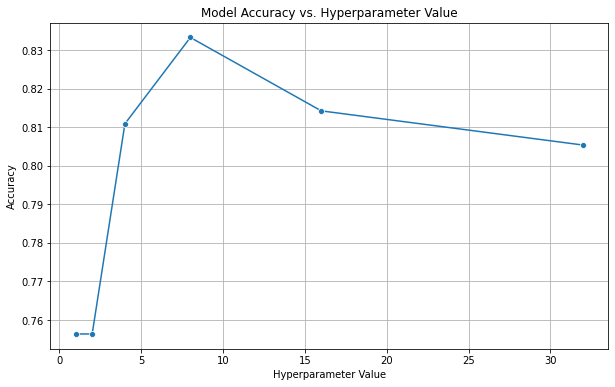

In [23]:
# Define the max depth values to evaluate
depths = [1, 2, 4, 8, 16, 32]

# Initialize a list to store the accuracy scores
accuracies = []

# Train and evaluate Decision Trees with different depths
for depth in depths:
    accuracy = train_test_DT(X_train, X_test, y_train, y_test, depth)
    accuracies.append(accuracy)
    print(f"Accuracy for Decision Tree with max depth {depth}: {accuracy}")

# Use the visualize_accuracy function to plot the results
visualize_accuracy(depths, accuracies)

<b>Analysis</b>: Analyze this graph. Pay attention to the accuracy scores. Answer the following questions in the cell below.<br>

How would you go about choosing the best model configuration based on this plot? <br>
What other hyperparameters of interest would you want to tune to make sure you are finding the best performing model?

1) Identifying the Peak Accuracy: The model with a max depth of 8 achieves the highest accuracy (0.8332). This suggests that a max depth of 8 is optimal for this dataset, as increasing the depth beyond this value does not improve performance and even leads to a slight decline.

2) Consider Overfitting: While deeper trees (higher max depths) can capture more complex patterns in the training data, they may also overfit, leading to poorer generalization on test data. The decline in accuracy at max depths 16 and 32 could indicate overfitting.

3) Balance Complexity and Performance: The plot shows that while increasing the max depth from 1 to 8 improves accuracy, further increases reduce accuracy. Thus, a max depth of 8 balances model complexity and performance effectively.

Additional Hyperparameters to Tune:

1) Minimum Samples Split (min_samples_split): The minimum number of samples required to split an internal node. Increasing this value can prevent the model from learning overly specific patterns.

2) Minimum Samples Leaf (min_samples_leaf): The minimum number of samples required to be at a leaf node. Setting this value helps prevent overfitting by ensuring that leaf nodes have a minimum number of samples.

3) Maximum Features (max_features): The number of features to consider when looking for the best split. Limiting the number of features can reduce variance and help the model generalize better.

4) Criterion: The function to measure the quality of a split (gini for Gini impurity or entropy for information gain). Trying different criteria can lead to different splits and potentially better models.

5) Random State: A seed value to ensure reproducibility. Using different random states can provide a sense of model stability and performance across various random partitions of the data.


## Part 6. Train KNN Classifiers and Evaluate their Performances


The code cell below contains function definition named `train_test_knn()`. This function should:
1. train a KNN classifier on the training data (Remember to use ```KNeighborsClassifier()``` to create a model object).
2. test the resulting model on the test data
3. compute and return the accuracy score of the resulting predicted class labels on the test data. 

<i>Note</i>: You will train KNN classifiers using the same training and test data that you used to train decision trees.

<b>Task:</b> Complete the function to make it work.

In [25]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    
   # Create the KNeighborsClassifier object with the specified number of neighbors
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier on the training data
    model.fit(X_train, y_train)
    
    # Predict the labels for the test data
    prediction = model.predict(X_test)
    
    # Compute and return the accuracy score
    accuracy = accuracy_score(y_test, prediction)
    
    return accuracy


#### Train Three KNN Classifiers and Evaluate Their Performances

<b>Task:</b> Use your function to train three different KNN classifiers, each with a different value for hyperparameter $k$: $3, 30$, and $300$. <i>Note</i>: This make take a second.


In [26]:
# Define the values for k to evaluate
k_values = [3, 30, 300]

# Initialize a list to store the accuracy scores
knn_accuracies = []

# Train and evaluate KNN classifiers with different values of k
for k in k_values:
    accuracy = train_test_knn(X_train, X_test, y_train, y_test, k)
    knn_accuracies.append(accuracy)
    print(f"Accuracy for KNN with k={k}: {accuracy}")
    
    

Accuracy for KNN with k=3: 0.759515570934256
Accuracy for KNN with k=30: 0.7755190311418685
Accuracy for KNN with k=300: 0.7696799307958477


<b>Task:</b> Now call the function `visualize_accuracy()` with the appropriate arguments to plot the results.

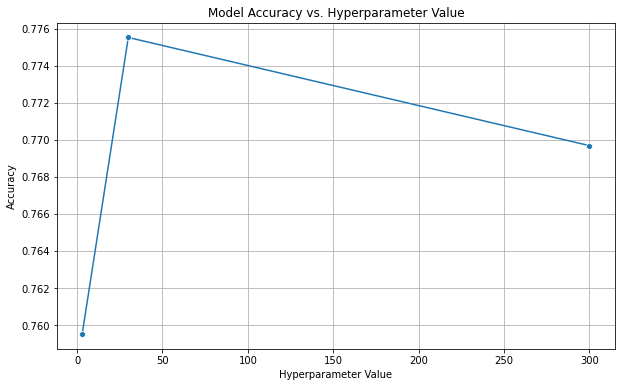

In [27]:
# Use the visualize_accuracy function to plot the results
visualize_accuracy(k_values, knn_accuracies)


#### Train Multiple KNN Classifiers Using Different Hyperparameter Values and Evaluate Their Performances

<b>Task:</b> Let's train on more values for $k$.

1. Array `k_range` contains multiple values for hyperparameter $k$. Train one KNN model per value of $k$
2. Use your visualization function to plot the values of $k$ and each model's resulting accuracy score.

<i>Note</i>: This make take a second.

In [29]:
k_range = np.arange(1, 40, step = 3) 
k_range

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37])

Accuracy for KNN with k=1: 0.7454584775086506
Accuracy for KNN with k=4: 0.77530276816609
Accuracy for KNN with k=7: 0.7654628027681661
Accuracy for KNN with k=10: 0.7743295847750865
Accuracy for KNN with k=13: 0.7730320069204152
Accuracy for KNN with k=16: 0.7763840830449827
Accuracy for KNN with k=19: 0.7754108996539792
Accuracy for KNN with k=22: 0.776924740484429
Accuracy for KNN with k=25: 0.77530276816609
Accuracy for KNN with k=28: 0.7741133217993079
Accuracy for KNN with k=31: 0.7756271626297578
Accuracy for KNN with k=34: 0.7763840830449827
Accuracy for KNN with k=37: 0.7749783737024222


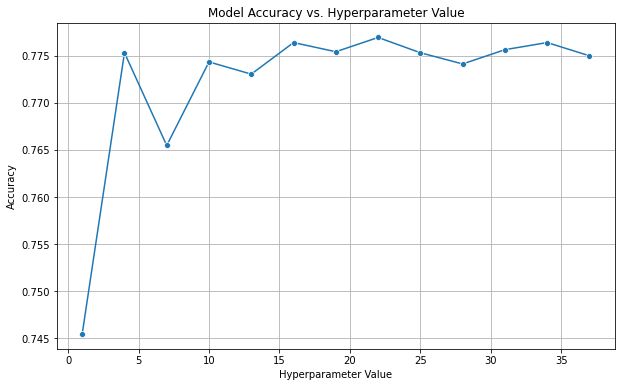

In [30]:
# Initialize a list to store the accuracy scores
knn_accuracies = []

# Train and evaluate KNN classifiers with different values of k
for k in k_range:
    accuracy = train_test_knn(X_train, X_test, y_train, y_test, k)
    knn_accuracies.append(accuracy)
    print(f"Accuracy for KNN with k={k}: {accuracy}")

# Use the visualize_accuracy function to plot the results
visualize_accuracy(k_range, knn_accuracies)



## Part 7. Analysis

1. Compare the performance of the KNN model relative to the Decision Tree model, with various hyperparameter values. Which model performed the best (yielded the highest accuracy score)? Record your findings in the cell below.

2. We tuned hyperparameter $k$ for KNNs and hyperparamter max depth for DTs. Consider other hyperparameters that can be tuned in an attempt to find the best performing model. Try a different combination of hyperparamters for both KNNs and DTs, retrain the models, obtain the accuracy scores and record your findings below. 

    <i>Note:</i> You can consult Scikit-learn documentation for both the [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class and the [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class to see how specific hyperparameters are passed as parameters to the model object.

In [31]:
# KNN Tuning and Retraining
# We'll tune the following hyperparameters for KNN:

# weights: 'uniform', 'distance'
# metric: 'euclidean', 'manhattan'

# Initialize lists to store results
knn_parameters = []
knn_accuracies = []

# Define hyperparameter grid
weights_options = ['uniform', 'distance']
metric_options = ['euclidean', 'manhattan']
k_values = [3, 5, 7, 10]

# Loop over combinations of hyperparameters
for k in k_values:
    for weight in weights_options:
        for metric in metric_options:
            knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
            knn_classifier.fit(X_train, y_train)
            y_pred = knn_classifier.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            knn_parameters.append((k, weight, metric))
            knn_accuracies.append(accuracy)
            print(f"KNN (k={k}, weights={weight}, metric={metric}) - Accuracy: {accuracy}")

# Find the best KNN configuration
best_knn_index = knn_accuracies.index(max(knn_accuracies))
best_knn_params = knn_parameters[best_knn_index]
best_knn_accuracy = knn_accuracies[best_knn_index]

print(f"Best KNN configuration: {best_knn_params} with accuracy: {best_knn_accuracy}")



KNN (k=3, weights=uniform, metric=euclidean) - Accuracy: 0.759515570934256
KNN (k=3, weights=uniform, metric=manhattan) - Accuracy: 0.7749783737024222
KNN (k=3, weights=distance, metric=euclidean) - Accuracy: 0.760705017301038
KNN (k=3, weights=distance, metric=manhattan) - Accuracy: 0.7773572664359861
KNN (k=5, weights=uniform, metric=euclidean) - Accuracy: 0.7648140138408305
KNN (k=5, weights=uniform, metric=manhattan) - Accuracy: 0.7826557093425606
KNN (k=5, weights=distance, metric=euclidean) - Accuracy: 0.7675173010380623
KNN (k=5, weights=distance, metric=manhattan) - Accuracy: 0.7840614186851211
KNN (k=7, weights=uniform, metric=euclidean) - Accuracy: 0.7654628027681661
KNN (k=7, weights=uniform, metric=manhattan) - Accuracy: 0.7841695501730104
KNN (k=7, weights=distance, metric=euclidean) - Accuracy: 0.768598615916955
KNN (k=7, weights=distance, metric=manhattan) - Accuracy: 0.7869809688581315
KNN (k=10, weights=uniform, metric=euclidean) - Accuracy: 0.7743295847750865
KNN (k=1

In [32]:
# Decision Tree Tuning and Retraining
# We'll tune the following hyperparameters for Decision Tree:

# criterion: 'gini', 'entropy'
# min_samples_split: 2, 4, 6
# min_samples_leaf: 1, 2, 3


# Initialize lists to store results
dt_parameters = []
dt_accuracies = []

# Define hyperparameter grid
criterion_options = ['gini', 'entropy']
min_samples_split_values = [2, 4, 6]
min_samples_leaf_values = [1, 2, 3]
max_depth_values = [None, 4, 8, 12]

# Loop over combinations of hyperparameters
for criterion in criterion_options:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            for max_depth in max_depth_values:
                dt_classifier = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, 
                                                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
                dt_classifier.fit(X_train, y_train)
                y_pred = dt_classifier.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                dt_parameters.append((max_depth, criterion, min_samples_split, min_samples_leaf))
                dt_accuracies.append(accuracy)
                print(f"DT (max_depth={max_depth}, criterion={criterion}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}) - Accuracy: {accuracy}")

# Find the best DT configuration
best_dt_index = dt_accuracies.index(max(dt_accuracies))
best_dt_params = dt_parameters[best_dt_index]
best_dt_accuracy = dt_accuracies[best_dt_index]

print(f"Best Decision Tree configuration: {best_dt_params} with accuracy: {best_dt_accuracy}")



DT (max_depth=None, criterion=gini, min_samples_split=2, min_samples_leaf=1) - Accuracy: 0.7980103806228374
DT (max_depth=4, criterion=gini, min_samples_split=2, min_samples_leaf=1) - Accuracy: 0.8214749134948097
DT (max_depth=8, criterion=gini, min_samples_split=2, min_samples_leaf=1) - Accuracy: 0.8306660899653979
DT (max_depth=12, criterion=gini, min_samples_split=2, min_samples_leaf=1) - Accuracy: 0.8255839100346021
DT (max_depth=None, criterion=gini, min_samples_split=2, min_samples_leaf=2) - Accuracy: 0.807742214532872
DT (max_depth=4, criterion=gini, min_samples_split=2, min_samples_leaf=2) - Accuracy: 0.8214749134948097
DT (max_depth=8, criterion=gini, min_samples_split=2, min_samples_leaf=2) - Accuracy: 0.8308823529411765
DT (max_depth=12, criterion=gini, min_samples_split=2, min_samples_leaf=2) - Accuracy: 0.8247188581314879
DT (max_depth=None, criterion=gini, min_samples_split=2, min_samples_leaf=3) - Accuracy: 0.8053633217993079
DT (max_depth=4, criterion=gini, min_samples_

1)

Decision Tree Model Accuracy Scores:

Max depth 1: 0.7564
Max depth 2: 0.7564
Max depth 4: 0.8109
Max depth 8: 0.8332 (Highest accuracy)
Max depth 16: 0.8117
Max depth 32: 0.8051

KNN Model Accuracy Scores:

k = 1: 0.7455
k = 4: 0.7753
k = 7: 0.7655
k = 10: 0.7743
k = 13: 0.7730
k = 16: 0.7764
k = 19: 0.7754
k = 22: 0.7769 (Highest accuracy)
k = 25: 0.7753
k = 28: 0.7741
k = 31: 0.7756
k = 34: 0.7764
k = 37: 0.7750

The Decision Tree model consistently showed higher accuracy scores compared to the KNN models across various hyperparameter values. The peak accuracy of the Decision Tree model (0.8332) was significantly higher than that of the KNN models (0.7769). The Decision Tree model not only provided the highest accuracy but also demonstrated stability around the optimal max depth (between 8 and 16).

2) I have done this part in the 2 previous cells

